In [1]:
from scipy.interpolate import RegularGridInterpolator
import numpy as np
import matplotlib.pyplot as plt

In [92]:
def f(x, y, z):
    return 2 * x**2 + 3 * y**2 - z + 100*np.sin(x*2) + 0.5/(y+1)


In [ ]:
resolution_orig = 80


x = np.linspace(0.0, 5, resolution_orig)
y = np.linspace(0.0, 5, resolution_orig)
z = np.linspace(0.0, 5, resolution_orig)
xg, yg ,zg = np.meshgrid(x, y, z, indexing='xy')

print(f"Data cube size: {np.prod(xg.size)}")

data = f(xg, yg, zg)

# data is now a 3-D array with data[i, j, k] = f(x[i], y[j], z[k]).

Data cube size: 512000


In [94]:
# Next, define an interpolating function from this data:

fill = None         # Extrapolate
method = "linear"  # Options: “linear”, “nearest”, “slinear”, “cubic”, “quintic” and “pchip”.

interp = RegularGridInterpolator((x, y, z), data,
                                 fill_value=fill, bounds_error=False, method=method)

In [95]:
# evaluate interpolator
x_eval = np.linspace(-2.0, 7, 30)
y_eval = np.linspace(-2.0, 7, 30)
z_eval = np.linspace(-2.0, 7, 30)

# Evaluate the interpolator on the full 3D grid (keeps result for inspection)
Xg, Yg, Zg = np.meshgrid(x_eval, y_eval, z_eval, indexing='xy')


(30, 30)


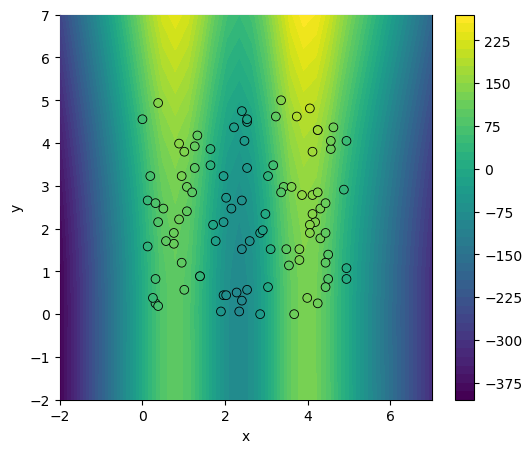

In [97]:
fig, ax = plt.subplots(1, 1, figsize=(6,5))

# Choose a z-slice (middle slice) to plot using contourf
i = 10
z_mid = z_eval[i]

# Create evaluation grid for contour
x_plt = Xg[:,:,i]
y_plt = Yg[:,:,i]
eval_at = np.array([x_plt.flatten(),y_plt.flatten(),Zg[:,:,i].flatten()]).T
z_vals = interp( eval_at )

z_plt = np.reshape(z_vals, Xg.shape[:-1])
print(z_plt.shape)

# Match color scale between contour and scatter using vmin/vmax
vmin, vmax = np.amin(z_plt), np.amax(z_plt)
cf = ax.contourf(x_plt, y_plt, z_plt.T, levels=50, cmap='viridis', vmin=vmin, vmax=vmax,zorder=8)
fig.colorbar(cf, ax=ax)

# Overlay original data points projected to the nearest original z-plane
k = np.argmin(np.abs(z - z_mid))
Xo, Yo = np.meshgrid(x, y, indexing='xy')
Zo = data[:,:, k]

# Scatter original grid point samples, to validate
plt_samp = np.random.randint(0, np.prod(Zo.shape), 100)
x_scat = Xo.flatten()[plt_samp]
y_scat = Yo.flatten()[plt_samp]
z_scat = Zo.flatten()[plt_samp]
sc = ax.scatter(x_scat, y_scat, c=z_scat, cmap='viridis', marker='o',
                vmin=vmin, vmax=vmax, edgecolor='k', s=40, linewidth=0.6, zorder=10)

ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()